<a href="https://colab.research.google.com/github/shani123/PhishingThesis/blob/main/spam_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas


In [2]:
from google.colab import files
uploaded = files.upload()


Saving SMSSpamCollection to SMSSpamCollection


In [3]:
import pandas as pd

# Load the uploaded dataset
df = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])
print(df.head())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [4]:
import os
print(os.listdir())


['.config', 'SMSSpamCollection', 'sample_data']


In [5]:
import string

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

df['cleaned_message'] = df['message'].apply(preprocess_text)


In [6]:
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})


In [7]:
pip install scikit-learn

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_message'])
y = df['label_num']


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[965   1]
 [ 43 106]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.99      0.71      0.83       149

    accuracy                           0.96      1115
   macro avg       0.97      0.86      0.90      1115
weighted avg       0.96      0.96      0.96      1115



In [2]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))


NameError: name 'X_train' is not defined

In [3]:
import pandas as pd
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


In [4]:
df = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])


FileNotFoundError: [Errno 2] No such file or directory: 'SMSSpamCollection'

In [5]:
from google.colab import files
uploaded = files.upload()


Saving SMSSpamCollection to SMSSpamCollection


In [6]:
df = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])


In [7]:
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

df['cleaned_message'] = df['message'].apply(preprocess_text)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})


In [8]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_message'])
y = df['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.82      0.90       149

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



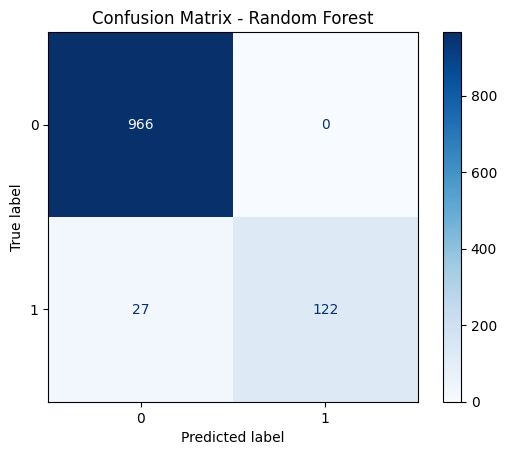

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [11]:
import numpy as np

# Get feature importance and map to words
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = vectorizer.get_feature_names_out()

# Show top 15 keywords
top_features = [(features[i], importances[i]) for i in indices[:15]]
for word, score in top_features:
    print(f"{word}: {score:.4f}")


txt: 0.0274
call: 0.0258
free: 0.0192
claim: 0.0168
mobile: 0.0143
stop: 0.0131
reply: 0.0127
150: 0.0118
your: 0.0115
500: 0.0111
win: 0.0107
prize: 0.0105
won: 0.0101
now: 0.0093
text: 0.0087
